# Case Study 1: From Exploration to Design

- Name: Perrie Soleimani
- Student ID: 81989196
- Link to GitHub Repository: 

This blank notebook is provided for you to use to answer questions from [Case Study 1](https://ubc-dsci.github.io/dsci-200/case-studies/case-study-1.html). 

### Part 1:

In [1]:
install.packages('tidyverse')
devtools::install_github("lbelzile/hecedsm")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'hecedsm' from a github remote, the SHA1 (df0a5444) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
library(tidyverse)
library(dplyr)
library(hecedsm)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘hecedsm’


The following object is masked from ‘package:stringr’:

    words




In [3]:
psdata <- BRLS21_EDA

**The summary:**  
In this study, researchers are trying to understand how use of smart watches can impact the drivers and distract them compared to mobile phones and audio communication. 31 participants were in a controlled driving simulator experience, and they all went through four conditions: notifications on a phone, on a smartwatch, on a speaker, and texting on a device (replying). Eye tracking measured where the drivers were looking at and how focused they were on the road.   
They found out that texting while driving caused a significantly worse distraction and the lowest performance compared to the other conditions, and receiving and replying to audio messages caused the least distraction. They also found out that Smartwatches cause more distraction compared to mobile phones, as participants spent more time looking away from the road in the smartwatch condition compared to the phone, however the driving performance did not differ significantly.

In [4]:
glimpse(psdata)

Rows: 10,942
Columns: 6
$ id        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ reltime   <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ task      <fct> baseline, baseline, baseline, baseline, baseline, baseline, …
$ occurence <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ eda       <dbl> 20.60959, 21.41062, 22.26244, 24.22100, 24.23851, 23.63703, …
$ hr        <dbl> 88.49560, 88.31564, 78.13892, 65.82009, 65.13290, 66.83456, …


There are 10,942 observations and 6 variables.
There are two Categorical variables:

- id : an identifier for participants  
- task: the task or condition

there are four numerical variables:

- reltime: relative time of the task  
- occurence: number of occurences  
- eda: electrodermal activity measure  
- hr: heart rate of the participant

We most likely do not need to change the types, considering they all seem to be of the correct types.

In [5]:
na_counts <- colSums(is.na(psdata))
na_props  <- (na_counts / nrow(psdata))* 100

na_counts
na_props

id   reltime      task occurence       eda        hr 
        0         0         0         0       214       538

id   reltime      task occurence       eda        hr 
 0.000000  0.000000  0.000000  0.000000  1.955767  4.916834

Only two of the variables have missing data, and for both of them the percentage of the missing data is less than 5 percent, so no large proportion of missing data.

In [6]:
class(psdata)
prop.table(table(psdata$task))
prop.table(table(psdata$id))

[1] "tbl_df"     "tbl"        "data.frame"


 baseline      cell voicecall     watch 
0.2500457 0.2767319 0.1272162 0.3460062 


          1           2           3           4           5           6 
0.007951014 0.032169622 0.034180223 0.039389508 0.034180223 0.034088832 
          7           8           9          10          11          12 
0.030981539 0.034545787 0.033906050 0.023944434 0.030524584 0.035825260 
         13          14          15          16          17          18 
0.036282215 0.031438494 0.029245111 0.041582892 0.030067629 0.032443795 
         19          20          21          22          23          24 
0.037013343 0.034088832 0.032900749 0.033631877 0.037104734 0.031529885 
         25          26          27          28          29          30 
0.032717967 0.031621276 0.038110035 0.034637178 0.024949735 0.027600073 
         31 
0.031347103 

There does not seem to be a class imbalance in any categorical variable in the dataset.

Warning message:
“Removed 739 rows containing missing values or values outside the scale range
(`geom_point()`).”


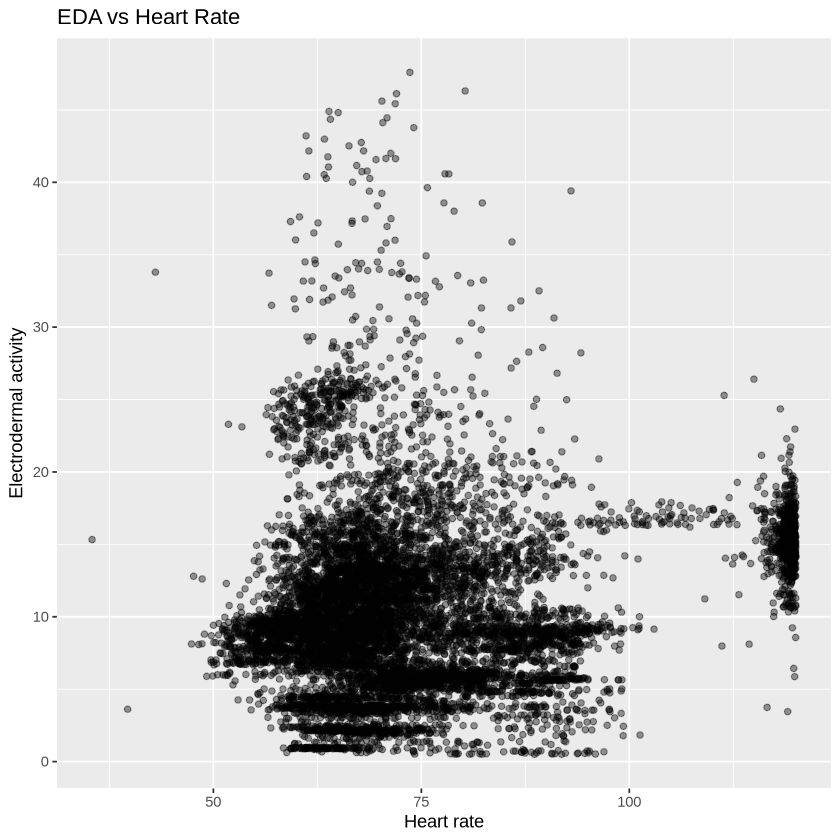

In [7]:
ggplot(psdata, aes(x = hr , y = eda)) +
  geom_point(alpha = 0.4) +
  labs(
    title = "EDA vs Heart Rate",
        x = "Heart rate",
        y = "Electrodermal activity")

This scatterplot is the correct type of plot to see the relation between two numerical variables.  
This plot shows the relationship between heart rate and electrodermal activity. The points are widely scattered, which shows a weak relationship between the two variables.

Warning message:
“Removed 538 rows containing non-finite outside the scale range (`stat_bin()`).”


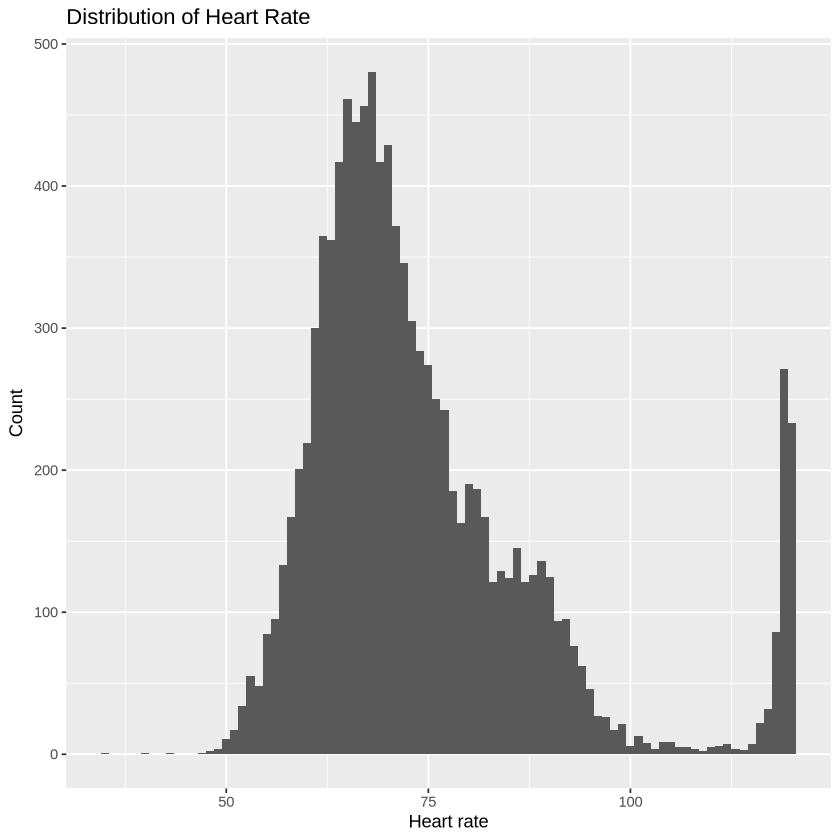

In [8]:
ggplot(psdata, aes(x = hr)) +
  geom_histogram(binwidth = 1) +
  labs(
    title = "Distribution of Heart Rate",
        x = "Heart rate",
        y = "Count")

The histogram is the correct plot to visualize the distribution of a numerical value.  
This plot shows the distribution of heart rate values. The distribution has a normal peak in the centre. The distribution is right skewed, and has a second spike on the further right side, suggesting a different condition which might be affecting the participants heart rate at times.

Warning message:
“Removed 538 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


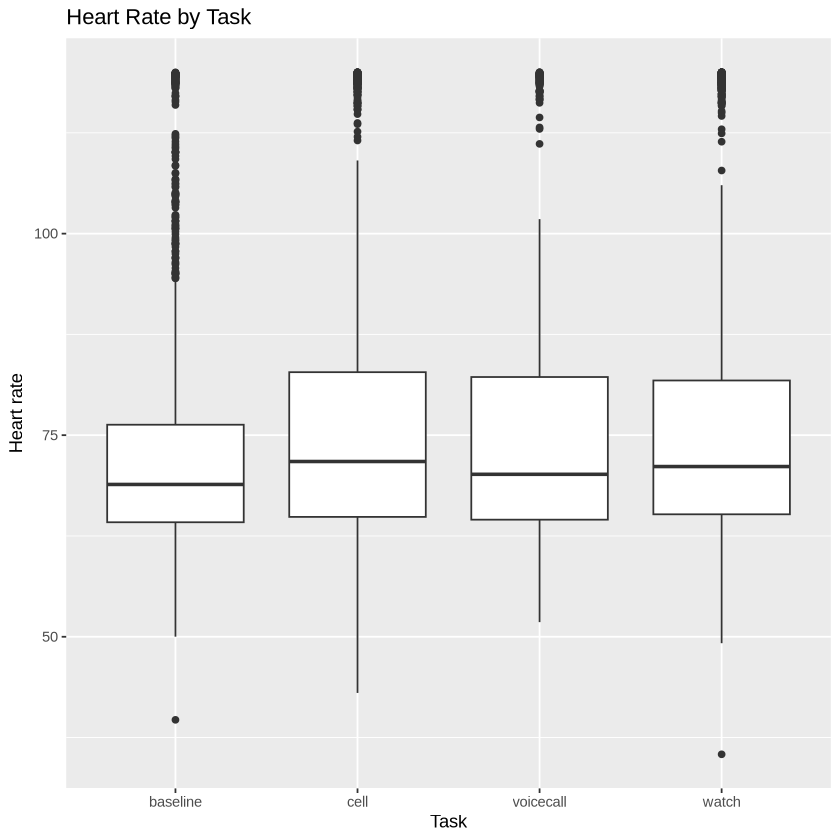

In [9]:
ggplot(psdata, aes(x = task, y = hr)) +
  geom_boxplot() +
  labs(
    title = "Heart Rate by Task",
        x = "Task",
        y = "Heart rate")

A boxplot is an appropriate plot to compare a categorical and a numerical variable. This box plot shows shows that heart rate varies across task conditions, and there is a lower median on the baseline, and the cell and watch conditions, have a slightly higher medians and have greater variability, which can indicate that they affected the participants differently.

One numerical variable: central tendency for heart rate
Heart rate often shows skew and outliers, in which case, the **median** is a better measure of central tendency than the mean because it is more resistant to extreme values and better reflects an average observation.

In [10]:
psdata |>
  summarise(
    hr_median = median(hr, na.rm = TRUE),
    hr_mean   = mean(hr, na.rm = TRUE),
    hr_sd     = sd(hr, na.rm = TRUE))

hr_median hr_mean  hr_sd   
1 70.47726  74.63768 15.24607

For a categorical variable like task, a relevant summary is a frequency table, as It tells how the dataset is distributed across conditions and whether one task dominates.

In [11]:
psdata |>
  count(task) |>
  mutate(share = n / sum(n)) |>
  select(task, share)

task      share    
1 baseline  0.2500457
2 cell      0.2767319
3 voicecall 0.1272162
4 watch     0.3460062

**Research question:**  
Can we predict which task a driver is doing (cell, voice call, or watch) using their physiological signals (heart rate and electrodermal activity measure) and their baseline levels?  
Since this is a prediction problem, we would need to design our model on a training set and then test its usefulness on a testing set.

In [12]:
psdata_feat <- psdata |>
  group_by(id) |>
  mutate(
    baseline_hr  = median(hr[task == "baseline"],  na.rm = TRUE),
    baseline_eda = median(eda[task == "baseline"], na.rm = TRUE),
    hr_difference  = hr  - baseline_hr,
    eda_difference = eda - baseline_eda) |>
  ungroup()

head(psdata_feat)

id reltime task     occurence eda      hr       baseline_hr baseline_eda
1 1  0       baseline 1         20.60959 88.49560 73.46692    20.55382    
2 1  1       baseline 1         21.41062 88.31564 73.46692    20.55382    
3 1  2       baseline 1         22.26244 78.13892 73.46692    20.55382    
4 1  3       baseline 1         24.22100 65.82009 73.46692    20.55382    
5 1  4       baseline 1         24.23851 65.13290 73.46692    20.55382    
6 1  5       baseline 1         23.63703 66.83456 73.46692    20.55382    
  hr_difference eda_difference
1 15.02868      0.05577       
2 14.84872      0.85680       
3  4.67200      1.70862       
4 -7.64683      3.66718       
5 -8.33402      3.68469       
6 -6.63236      3.08321

The new variables describing the heart rate difference and EDA difference, remove the differences in people’s resting physiology and focus the model on changes caused by the task, giving less biased results.

### Part 2:

The author is trying to answer 2 main types of questions:  
- Causal questions:  
The authors want to know if using different communication methods while driving causes changes in driver distraction and performance. For example, they compare smartwatch notifications, mobile phone notifications, voice based notifications, and texting to see which one leads to more distraction. This is a question that asks if changing a factor will lead to a change in another factor.
- Inferential questions:  
The authors also tries to draw conclusions for a wider population than the specific participants in the study. They formally test hypotheses such as whether drivers look away from the road more when using a smartwatch than a phone, or whether texting worsens driving performance compared to voice replies, where they are trying to see if this patterns reflect real effects rather than random variation.

**Population of interest :** 
Drivers in general, who might receive or answer to notifications while driving. especially drivers who are more likely to use smartwatches vs phones vs voice assistants.

**Sample:**  
A sample of 31 participants between the ages 18 to 47, recruited from the research panel of the authors’ institution. Participants volunteered by the panel website and were screened for several health and safety criteria as well as for having a valid driver’s license.  

This was a controlled experiment. The researchers assigned each participant multiple controlled conditions (e.g. cell, watch, etc) in a controlled driving simulator experience. They also randomized the order of conditions to remove bias. Considering so many factors in the environment was manipulated by the researchers, this was not an observational experiment.

The author used volunteer (or convenience) sampling. This is explained in Methods, 3.2. Sample and procedure, explaining how participants were voluntarily recruited through their research panel.

The authors probably used this method because it’s cost effective, practical and efficient for a lab based study.

Yes, there are several potential sources of bias in the sampling.  
- 1- Most participant's were young or middle aged. This can limit how the result can be applied to older drivers who may have a different reaction when interacting with technology.
- 2- Participants were recruited rom a university environment, meaning they may be more comfortable with smartwatches and smartphones compared to the general public.
- 3- Considering participation was voluntary, the sample might be over representing individuals who are more interested in research or technology.
- 4- The study was conducted in a driving simulator, and participants might have a different reaction when they face the same situation in real world driving.

If I was designing the study, I would keep the simulation as is due to safety reasons, and also because we can make sure no external factors will be affecting the results. However, I would try to change the sampling, and try to include older adults and people less interested in tech. (For example using stratified sampling). It would also be useful to have more people who are more experienced users of smartwatches (as there was only one such a person in the study). With this set of differences in choosing the samples, we will be able to get a result closer to real life and more specific for each group.
However this would be harder, and require more resources, such as financial resources. Recruitment would also be a more difficult challenge in this case.